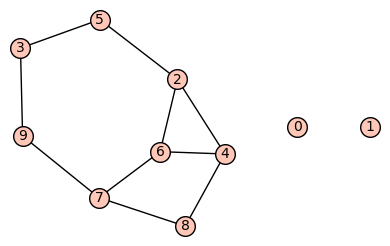

[2, 3, 4, 7]


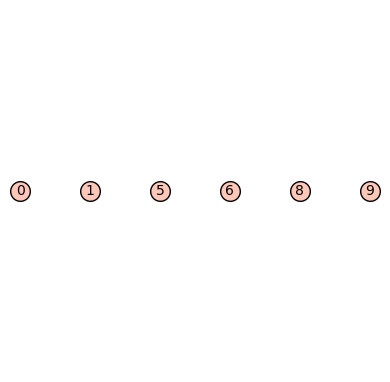

In [1]:
#Nastavimo željeno število vozlišč in povezav v "naključnem grafu"
st_vozlisc = 10
st_povezav =  10

#Generiramo graf in ga prikažemo
graf = graphs.RandomGNM(st_vozlisc, st_povezav)
graf.show()

#Z linearnim programom izločimo vozlišča v minemalnem pokritju grafa in jih izpišemo
povezave = MixedIntegerLinearProgram(maximization = False)
vozlisca = povezave.new_variable(binary = True)
povezave.set_objective( sum([vozlisca[v] for v in graf]) )

for u,v in graf.edges(labels = False):
    povezave.add_constraint( vozlisca[u] + vozlisca[v] >= 1 )

povezave.solve()
vozlisca = povezave.get_values(vozlisca)
print [v for v,i in vozlisca.items() if i]

#Generiramo testni graf, ki je kopija originala in iz njega odstranimo domnevno pokritje,če je to res pokritje nam ostanejo samo vozlišča
graf_test = copy(graf)
graf_test.delete_vertices([v for v,i in vozlisca.items() if i])
graf_test.show()
